In [1]:
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')


# Analysis of variance

- Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among means. 
- ANOVA was developed by the statistician Ronald Fisher.
- ANOVA is based on the law of total variance, where the observed variance in a particular variable is partitioned into components attributable to different sources of variation.
- In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means.
- In other words, the ANOVA is used to test the difference between two or more means.

### problem with multiple t-tests :

- multiple t-test even at small significance level , can result in a high probability of false positive error ( incorrectly rejecting null hypothesis.  )
- if the result of one hypothesis test is : mean1 = mean2 
- and another hypothesis test result is mean2 = mean3.
- we cannot conclude that mean1 = mean2 = mean3. 
- as the type 1 error (alfa)(false +ve) multiplies. 
              

### Assumptions : 

- independence of observations 
- distibutions of the residuals are normal.
- equality of variance : homoscedasticity - the variance of data in groups should be the same.

### Partitioning of the sum of squares : 

-  The definitional equation of sample variance is

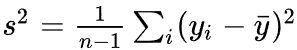

 - where the divisor is called the degrees of freedom (DF), the summation is called the sum of squares (SS), the result is called the mean square (MS) and the squared terms are deviations from the sample mean.

- ANOVA estimates 3 sample variances: 
    - a total variance based on all the observation deviations from the grand mean
    - an error variance based on all the observation deviations from their appropriate treatment means a treatment variance. 
    - The treatment variance is based on the deviations of treatment means from the grand mean
- the result being multiplied by the number of observations in each treatment to account for the difference between the variance of observations and the variance of means.

> The fundamental technique is a partitioning of the total sum of squares SS into components related to the effects used in the model.
For example, the model for a simplified ANOVA with one type of treatment at different levels.

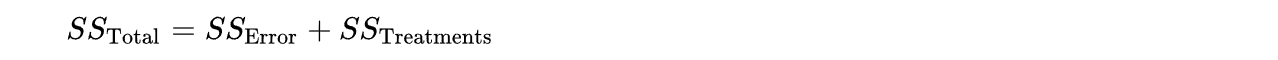

>The number of degrees of freedom DF can be partitioned in a similar way: one of these components (that for error) specifies a chi-squared distribution which describes the associated sum of squares, while the same is true for "treatments" if there is no treatment effect.

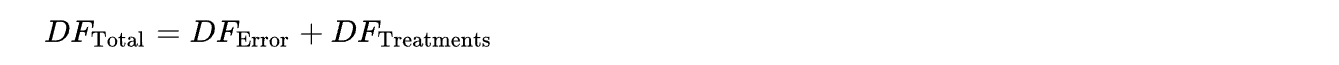

 #### SST =  SSE + SSC

    - SST : total/ overall sum of squares 
        > sum of squares between each data point and the overall mean
        
    - SSC : column/between/treatment sum of ssquares 
        > sum of squares  between each group mean and overall mean
        
    - SSE : Within/error sum of squares 
        > sum of squares between each data points and their own group mean



### The F-test :

- The F-test is used for comparing the factors of the total deviation. For example, in one-way, or single-factor ANOVA, statistical significance is tested for by comparing the F test statistic

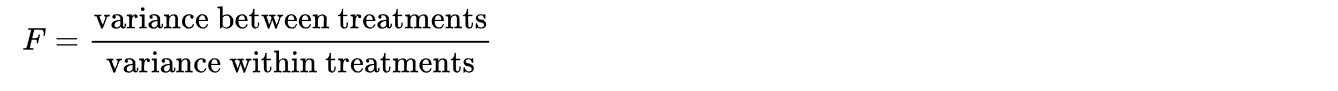

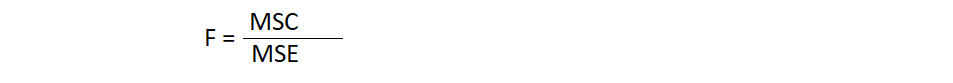

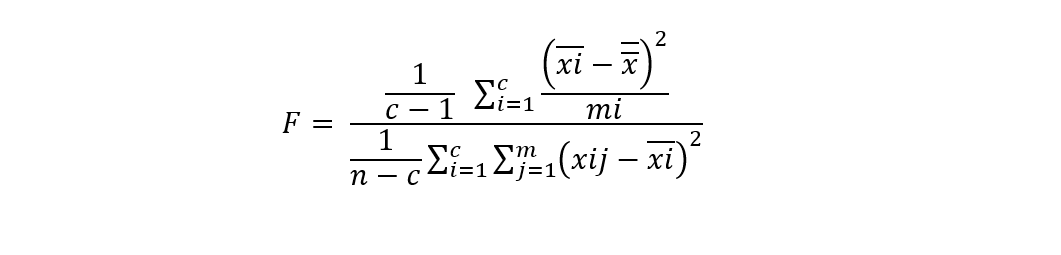

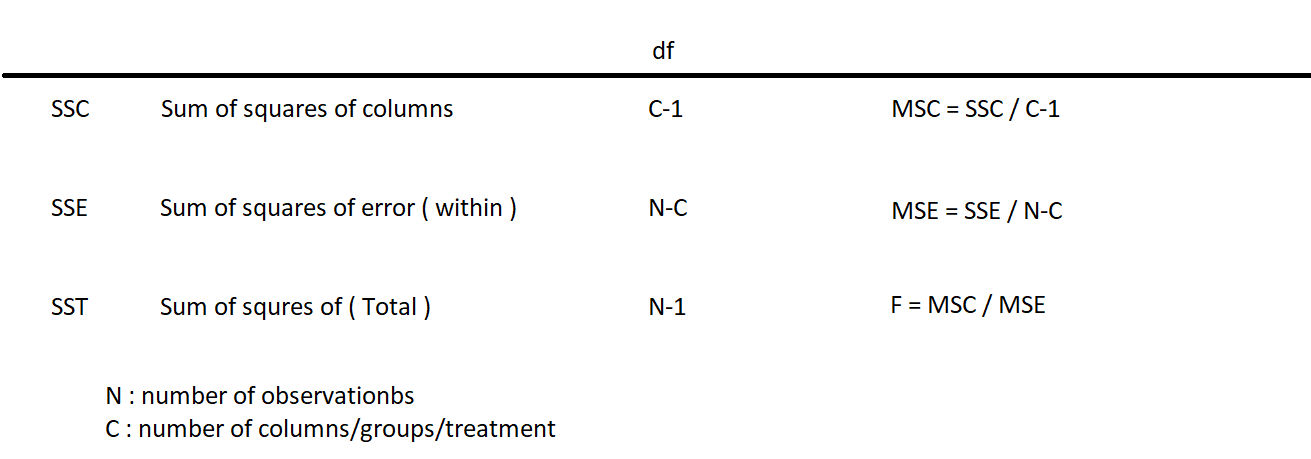

In [2]:
# lets say if we want to test the recovery time of all given 7 drugs are equal or not! 


In [3]:
drug1 = np.random.normal(4.0,0.2,50)
drug2 = np.random.normal(4.0,0.2,50)
drug3 = np.random.normal(4.0,0.2,50)
drug4 = np.random.normal(4.0,0.2,50)
drug5 = np.random.normal(4.0,0.2,50)
drug6 = np.random.normal(4.0,0.2,50) 
drug7 = np.random.normal(4.0,0.2,50)

In [4]:
data = pd.DataFrame([drug1,drug2,drug3,drug4,drug5,drug6,drug7]).T

In [5]:
data.columns = ["drug1","drug2","drug3","drug4","drug5","drug6","drug7"]

In [6]:
data

,drug1,drug2,drug3,drug4,drug5,drug6,drug7
0,4.102766,4.258482,4.031178,4.043074,4.093905,3.959655,4.144183
1,3.955681,3.865277,3.828802,3.971279,3.777770,4.065267,3.784634
2,3.792995,3.993227,3.867928,4.138414,4.025592,3.616073,4.266846
3,4.036898,3.955308,4.037317,3.859953,3.862290,3.755713,3.628651
4,4.053054,3.849944,3.822086,3.651658,3.929213,3.898828,4.203842
5,3.998699,3.794495,4.088882,4.119326,3.982046,4.025257,4.158828
6,3.813459,3.979109,3.811192,4.020194,3.853444,3.753385,4.004311
7,4.068969,3.979546,3.886203,4.050010,3.765749,4.226309,4.338868
8,4.201441,4.175382,4.016277,3.894615,4.094560,3.687031,3.745400
9,4.117499,4.019582,3.950666,3.966273,4.080548,3.842183,3.835975


In [7]:
np.mean(np.mean(data,axis = 0)) # overall mean

4.009741488468633

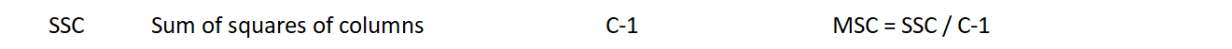

In [8]:
column_means = np.mean(data,axis = 0)
column_means

drug1    4.028562
drug2    4.023755
drug3    3.967768
drug4    3.996960
drug5    4.056064
drug6    3.972336
drug7    4.022745
dtype: float64

In [9]:
overall_mean = np.sum(np.sum(data,axis = 0))/(len(data)*len(data.columns))
overall_mean

4.009741488468633

In [10]:
SSC = np.sum((column_means-overall_mean)**2) * len(data)
SSC

0.30948639472749595

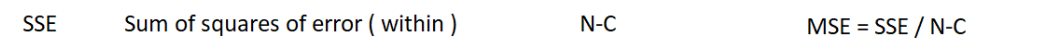

    each data points with its own mean

In [11]:
column_means

drug1    4.028562
drug2    4.023755
drug3    3.967768
drug4    3.996960
drug5    4.056064
drug6    3.972336
drug7    4.022745
dtype: float64

In [12]:
SSE = 0
for group in data.columns:
    SSE += np.sum((data[group]-np.mean(data[group]))**2)

In [13]:
SSE

12.399391274830078

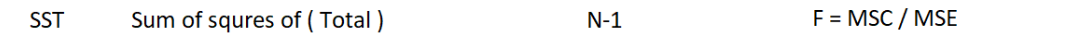

In [14]:
overall_mean

4.009741488468633

In [15]:
SST = 0

for grp in data.columns:
    for ele in data[grp]:
        SST += np.sum((ele-overall_mean)**2)
SST

12.708877669557587

In [16]:
SST = SSC+SSE

In [17]:
SST

12.708877669557575

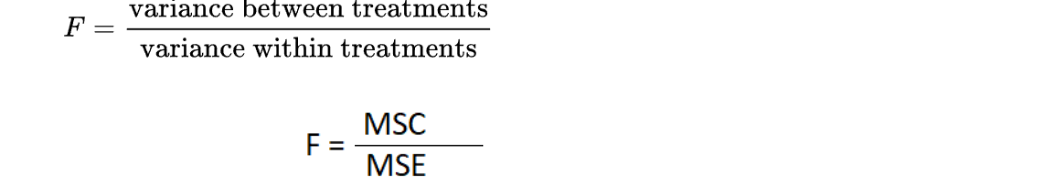m

In [18]:
n = len(data)* len(data.columns)
n

350

In [19]:
c = len(data.columns)
c

7

In [20]:
MSC = SSC/(c-1)

In [21]:
MSE = SSE/ (n-c)

In [22]:
MSC,MSE

(0.05158106578791599, 0.03614982878959207)

In [23]:
F_ratio = MSC/MSE
F_ratio

1.426868881956275

In [24]:
# cdf(x, dfn, dfd, loc=0, scale=1)

In [25]:
p_value = 1-stats.f.cdf(F_ratio,c-1,n-c)
p_value 

<IPython.core.display.Javascript object>

0.20337473057779887

In [26]:
F_critical = stats.f.ppf(0.95,c-1,n-c)
F_critical

<IPython.core.display.Javascript object>

2.1250365781660565

In [27]:
stats.f_oneway(data["drug1"],
              data["drug2"],
              data["drug3"],
              data["drug4"],
              data["drug5"],
              data["drug6"],
               data["drug7"],
              )

<IPython.core.display.Javascript object>

F_onewayResult(statistic=1.4268688819562867, pvalue=0.20337473057779545)

In [28]:
if F_ratio > F_critical:
    print("reject null, all populations means are different ")
else:
    print("all population means are same")
    
if p_value < 0.05:
    print("reject null, all populations means are different ")
else:
    print("all population means are same")

all population means are same
all population means are same


<AxesSubplot:ylabel='Density'>

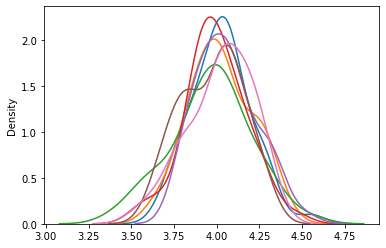

In [29]:
sns.kdeplot(drug1)
sns.kdeplot(drug2)
sns.kdeplot(drug3)
sns.kdeplot(drug4)
sns.kdeplot(drug5)
sns.kdeplot(drug6)
sns.kdeplot(drug7)


In [30]:
# one-way anova with same sample sizes. 

In [1]:
def one_way_ANOVA(*X):
    data = pd.DataFrame(X).T
    print(data)
    column_means = np.mean(data,axis = 0)
    print()
    
    print(column_means)
    print()
    overall_mean = np.sum(np.sum(data,axis = 0))/(len(data)*len(data.columns))
    print(overall_mean)
    SSC = 0
    SSC = np.sum((column_means-overall_mean)**2) * len(data)
    
    SSE = 0
    for group in data.columns:
        SSE += np.sum((data[group]-np.mean(data[group]))**2)
        
    SST = 0
    for grp in data.columns:
        for ele in data[grp]:
            SST += np.sum((ele-overall_mean)**2)
    
    n = len(data)* len(data.columns)
    c = len(data.columns)
    print(n,c)
    MSC = SSC/(c-1)
    MSE = SSE/ (n-c)
    F_ratio = MSC/MSE
    
    print()
    print("SSC:",SSC)
    print("MSC:",MSC)
    print("SSE:",SSE)
    print("MSE:",MSE)
    print()
    
    print("F-Ratio: ",F_ratio)
    p_value = 1-stats.f.cdf(F_ratio,c-1,n-c)
    F_critical = stats.f.ppf(0.95,c-1,n-c)
    print("F_critical : ",F_critical)
    
    print("Results : ")
    if F_ratio > F_critical:
        print("reject null, all populations means are different ")
    else:
        print("all population means are same")
    
    
    if p_value < 0.05:
        print("reject null, all populations means are different ")
    else:
        print("all population means are same")
    return F_ratio,p_value
              

In [32]:
one_way_ANOVA([8,10,12,8,7],[12,11,9,14,4],[18,12,16,6,8],[13,9,12,16,15])

    0   1   2   3
0   8  12  18  13
1  10  11  12   9
2  12   9  16  12
3   8  14   6  16
4   7   4   8  15

0     9.0
1    10.0
2    12.0
3    13.0
dtype: float64

11.0
20 4

SSC: 50.0
MSC: 16.666666666666668
SSE: 208.0
MSE: 13.0

F-Ratio:  1.2820512820512822


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

F_critical :  3.238871517453585
Results : 
all population means are same
all population means are same


(1.2820512820512822, 0.3143594700488932)

In [33]:
stats.f_oneway([8,10,12,8,7],[12,11,9,14,4],[18,12,16,6,8],[13,9,12,16,15])

<IPython.core.display.Javascript object>

F_onewayResult(statistic=1.2820512820512822, pvalue=0.3143594700488932)

In [2]:
stats.f_oneway([8,9,11,12],[6,8,10,4],[14,12,18,9],[20,22,25,23])

<IPython.core.display.Javascript object>

F_onewayResult(statistic=25.221574344023324, pvalue=1.8124793267561276e-05)

In [34]:
# anova one way works with different sample sizes : 

G1 = norm.rvs(loc= 10.0,scale = 2.0,size = 400)
G2 = norm.rvs(loc= 10.3,scale = 2.1,size = 400)
G3 = norm.rvs(loc= 9.8, scale = 2.3,size = 500)

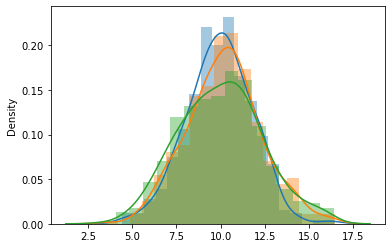

In [35]:
sns.distplot(G1)
sns.distplot(G2)
sns.distplot(G3)
plt.show()

In [36]:
stats.f_oneway(G1,G2,G3)

<IPython.core.display.Javascript object>

F_onewayResult(statistic=1.5141055426129606, pvalue=0.22039349061926153)

In [37]:
stats.f.ppf(0.95,3-1,1300-3) # T-critical value

<IPython.core.display.Javascript object>

3.002662301977574

In [38]:
1-stats.f.cdf(6.1366,3-1,1300-3)  # p-value 

<IPython.core.display.Javascript object>

0.002225558713822906

    as sample sizes increases , ANOVA can detect even very small differences in mean1 mean2 mean3.
    variance in p-value depends on sample size of sample data

    under null hypothesis , 
    
    Test Statistic F-Ratio (f) ~ F-distribution(c-1,n-c)

## F-distribution

- the F-distribution or F-ratio, also known as Snedecor's F distribution or the Fisher–Snedecor distribution is a continuous probability distribution that arises frequently as the null distribution of a test statistic, most notably in the analysis of variance (ANOVA) and other F-tests.

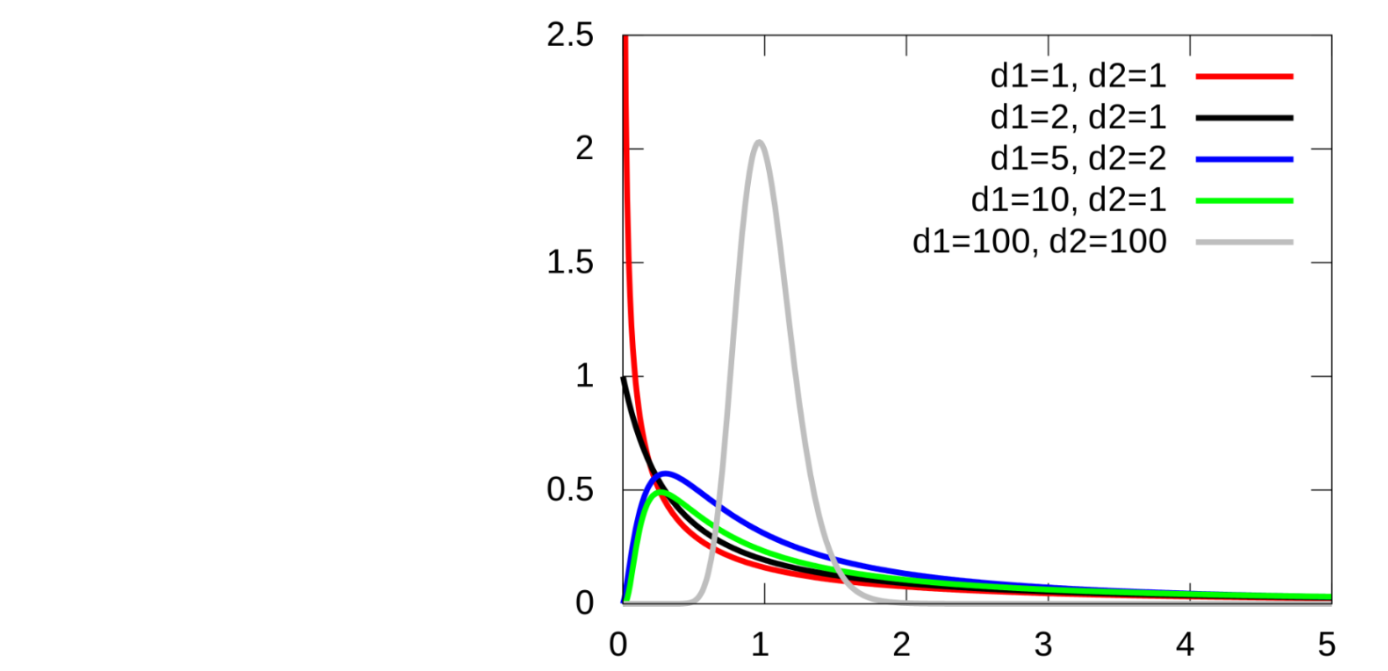

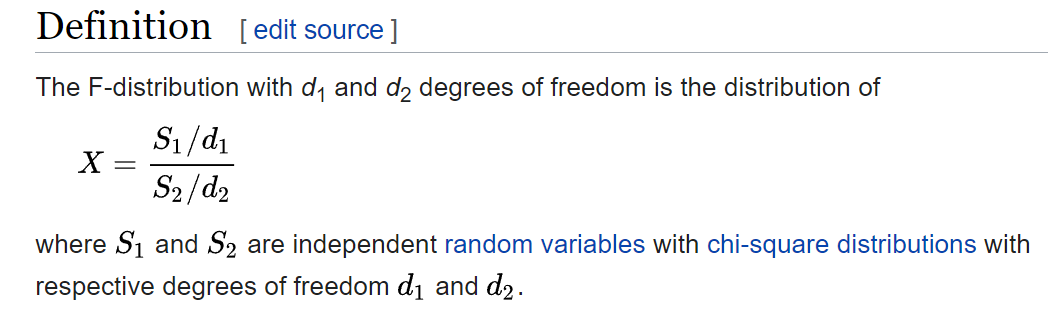

# two-way Anova (w/o replication)

Lest assume that starbucksuses secret shoppers who appear to be customers to enter a store and document their experience in terms of customer service and quality.
the secrete shopeers service standardize training by stabucks to ensure consistency and objectivity in their store reviews. 

we would like to know if a difference in secrete shoppers ratigs exists among the cities. 
are they all same ? 
is one significantly higher than other two ? 
are all three different from each other ? 


In [40]:
df = pd.read_csv("Starbucks.csv",index_col=0)

In [41]:
df.index = ['shopper1', 'shopper2', 'shopper3', 'shopper4', 'shopper5',
       'shopper6']

In [42]:
df

,sydney,brisbane,melborne
shopper1,75,75,90
shopper2,70,70,70
shopper3,50,55,75
shopper4,65,60,85
shopper5,80,65,80
shopper6,65,65,65


SST = SSC + SSB + SSE


In [43]:
overall_mean = np.sum(np.sum(df,axis = 0))/(len(df)*len(df.columns))
overall_mean

70.0

In [44]:
column_means = np.mean(df,axis = 0)
column_means

sydney      67.5
brisbane    65.0
melborne    77.5
dtype: float64

In [45]:
block_means = np.mean(df,axis = 1)
block_means

shopper1    80.0
shopper2    70.0
shopper3    60.0
shopper4    70.0
shopper5    75.0
shopper6    65.0
dtype: float64

In [46]:
SST = 0
for col in df.columns:
    for r in df[col]:
        SST += ((r-overall_mean)**2)
SST

1750.0

In [47]:
SSC = np.sum((column_means-overall_mean)**2)*len(df)
SSC

525.0

In [48]:
SSB = np.sum((block_means-overall_mean)**2)*len(df.columns)
SSB

750.0

In [49]:
SSE = SST-SSC-SSB
SSE

475.0

In [50]:
dfc = len(df.columns)-1
dfc

2

In [51]:
dfe = (len(df.columns)-1)*(len(df)-1)
dfe

10

In [52]:
dft = len(df)*len(df.columns)-1
dft

17

In [53]:
dfb = len(df)-1
dfb

5

In [54]:
MSC = SSC/dfc
MSC

262.5

In [55]:
MSB = SSB/dfb
MSB

150.0

In [56]:
MSE = SSE/dfe
MSE

47.5

In [57]:
F_column = MSC/MSE
F_column

5.526315789473684

In [58]:
F_block = MSB/MSE
F_block

3.1578947368421053

In [59]:
p_value_col = 1-stats.f.cdf(F_column,dfc,dfe)
p_value_col

<IPython.core.display.Javascript object>

0.024180654296874993

In [60]:
p_value_block = 1-stats.f.cdf(F_block,dfb,dfe)
p_value_block

<IPython.core.display.Javascript object>

0.05739916157799785

In [61]:
F_crtical_block = stats.f.ppf(0.95,dfb,dfe)
F_crtical_block


<IPython.core.display.Javascript object>

3.3258345304130112

In [62]:
F_crtical_col = stats.f.ppf(0.95,dfc,dfe)
F_crtical_col


<IPython.core.display.Javascript object>

4.1028210151304005

In [63]:
df.columns

Index(['sydney', 'brisbane', 'melborne'], dtype='object')

In [64]:
df.mean(axis = 0)

sydney      67.5
brisbane    65.0
melborne    77.5
dtype: float64

In [65]:
df.reset_index()

,index,sydney,brisbane,melborne
0,shopper1,75,75,90
1,shopper2,70,70,70
2,shopper3,50,55,75
3,shopper4,65,60,85
4,shopper5,80,65,80
5,shopper6,65,65,65


<AxesSubplot:>

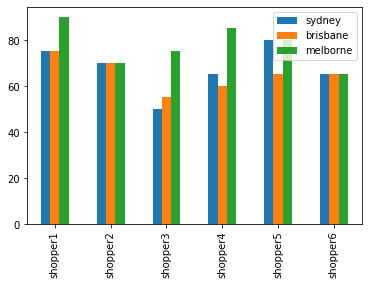

In [66]:
df.plot(kind = "bar")

In [67]:
# using library 

In [68]:
df = df.reset_index()

In [69]:
df = df.melt(id_vars="index",value_name="rating",var_name="city")

In [70]:
df

,index,city,rating
0,shopper1,sydney,75
1,shopper2,sydney,70
2,shopper3,sydney,50
3,shopper4,sydney,65
4,shopper5,sydney,80
5,shopper6,sydney,65
6,shopper1,brisbane,75
7,shopper2,brisbane,70
8,shopper3,brisbane,55
9,shopper4,brisbane,60


In [71]:
from statsmodels.formula.api import ols

In [72]:
ano2 = ols("rating~city+index",data = df).fit()

In [73]:
ano2

In [74]:
sm.stats.anova_lm(ano2,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
city,2.0,525.0,262.5,5.526316,0.024181
index,5.0,750.0,150.0,3.157895,0.057399
Residual,10.0,475.0,47.5,NaN,NaN


## sm.statsmodel eexample 

In [140]:
>>> import statsmodels.api as sm
>>> from statsmodels.formula.api import ols

In [141]:
>>> moore = sm.datasets.get_rdataset("Moore", "carData", cache=True) # load


In [142]:
moore

<class 'statsmodels.datasets.utils.Dataset'>

In [143]:
data = moore.data
data

,partner.status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36
5,low,6,low,18
6,low,12,medium,51
7,low,4,medium,44
8,low,13,low,31
9,low,12,low,36


In [144]:
data = data.rename(columns={"partner.status" :
                             "partner_status"}) 

In [134]:
 moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',
                 data=data).fit()


In [135]:
>>> table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
>>> print(table)

                                              sum_sq    df          F  \
C(fcategory, Sum)                          11.614700   2.0   0.276958   
C(partner_status, Sum)                    212.213778   1.0  10.120692   
C(fcategory, Sum):C(partner_status, Sum)  175.488928   2.0   4.184623   
Residual                                  817.763961  39.0        NaN   

                                            PR(>F)  
C(fcategory, Sum)                         0.759564  
C(partner_status, Sum)                    0.002874  
C(fcategory, Sum):C(partner_status, Sum)  0.022572  
Residual                                       NaN  


In [136]:
table

,sum_sq,df,F,PR(>F)
"C(fcategory, Sum)",11.614700,2.0,0.276958,0.759564
"C(partner_status, Sum)",212.213778,1.0,10.120692,0.002874
"C(fcategory, Sum):C(partner_status, Sum)",175.488928,2.0,4.184623,0.022572
Residual,817.763961,39.0,NaN,NaN
